## Initial Data

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from itertools import combinations
from sklearn.ensemble import RandomForestClassifier

In [48]:
data=pd.read_csv("asteroids_relative_positions.csv")
data.shape

(523, 21)

In [49]:
data.dtypes

Object Designation                  object
Year Range                          object
Potential Impacts                    int64
Impact Probability (cumulative)    float64
Vinfinity (km/s)                   float64
H (mag)                            float64
Estimated Diameter (km)            float64
Palermo Scale (cum.)               float64
Palermo Scale (max.)               float64
Torino Scale (max.)                float64
Unnamed: 10                         object
a                                  float64
e                                  float64
i                                  float64
Omega                              float64
omega                              float64
M0                                 float64
epoch                              float64
relative_position_x                float64
relative_position_y                float64
relative_position_z                float64
dtype: object

In [50]:
data.head()

Object Designation Year Range  Potential Impacts  \
0              29075  2880-2880                  1   
1             101955  2178-2290                157   
2         2007%20FT3  2024-2119                 89   
3          1979%20XB  2056-2113                  4   
4       2000%20SG344  2069-2122                300   

   Impact Probability (cumulative)  Vinfinity (km/s)  H (mag)  \
0                     3.800000e-04             14.10     17.9   
1                     5.700000e-04              5.99     20.6   
2                     8.600000e-07             17.07     20.0   
3                     8.500000e-07             23.76     18.5   
4                     2.700000e-03              1.36     24.8   

   Estimated Diameter (km)  Palermo Scale (cum.)  Palermo Scale (max.)  \
0                    1.300                 -0.93                 -0.93   
1                    0.490                 -1.41                 -1.59   
2                    0.341                 -2.63                 -2.79   
3                    0.660                 -2.71                 -3.01   
4                    0.037                 -2.78                 -3.13   

   Torino Scale (max.)  ...         a         e          i       Omega  \
0                  NaN  ...  1.698926  0.507663  12.156544  356.592443   
1                  NaN  ...  1.126391  0.203745   6.034944    2.060866   
2                  0.0  ...  1.129715  0.307844  26.871719    9.894140   
3                  0.0  ...  2.228086  0.708450  24.734121   86.055503   
4                  0.0  ...  0.977350  0.066825   0.112887  191.758848   

        omega          M0      epoch  relative_position_x  \
0  224.763952  223.310904  2460600.5         3.104474e+11   
1   66.223061  101.703952  2455562.5         7.727928e+09   
2  277.183462  297.962250  2454180.5        -1.099104e+10   
3   75.579898  346.318374  2444221.5         2.703217e+11   
4  275.546739  227.673499  2460600.5         2.134002e+10   

   relative_position_y  relative_position_z  
0         2.763536e+11         6.888569e+10  
1         4.143231e+10         8.513246e+09  
2        -6.172459e+10        -1.105619e+08  
3        -3.271281e+11        -6.658330e+10  
4         2.825774e+10        -1.703516e+08  

[5 rows x 21 columns]

In [51]:
data.count()

Object Designation                 523
Year Range                         523
Potential Impacts                  523
Impact Probability (cumulative)    523
Vinfinity (km/s)                   518
H (mag)                            523
Estimated Diameter (km)            523
Palermo Scale (cum.)               523
Palermo Scale (max.)               523
Torino Scale (max.)                521
Unnamed: 10                        523
a                                  523
e                                  523
i                                  523
Omega                              523
omega                              523
M0                                 523
epoch                              523
relative_position_x                523
relative_position_y                523
relative_position_z                523
dtype: int64

## Data Cleaning

In [52]:
print(data.isnull().sum())

Object Designation                 0
Year Range                         0
Potential Impacts                  0
Impact Probability (cumulative)    0
Vinfinity (km/s)                   5
H (mag)                            0
Estimated Diameter (km)            0
Palermo Scale (cum.)               0
Palermo Scale (max.)               0
Torino Scale (max.)                2
Unnamed: 10                        0
a                                  0
e                                  0
i                                  0
Omega                              0
omega                              0
M0                                 0
epoch                              0
relative_position_x                0
relative_position_y                0
relative_position_z                0
dtype: int64


In [53]:
data.describe()

Potential Impacts  Impact Probability (cumulative)  Vinfinity (km/s)  \
count         523.000000                     5.230000e+02        518.000000   
mean           46.275335                     4.941099e-04         11.822394   
std            88.115132                     4.608828e-03          6.533468   
min             1.000000                     7.500000e-10          0.410000   
25%             5.000000                     7.700000e-06          7.170000   
50%            17.000000                     3.500000e-05         10.490000   
75%            50.500000                     1.400000e-04         15.557500   
max          1244.000000                     1.000000e-01         35.530000   

          H (mag)  Estimated Diameter (km)  Palermo Scale (cum.)  \
count  523.000000               523.000000            523.000000   
mean    26.272849                 0.032801             -5.151625   
std      1.923107                 0.075299              0.708872   
min     17.900000                 0.002000             -6.000000   
25%     25.200000                 0.010000             -5.710000   
50%     26.500000                 0.017000             -5.320000   
75%     27.600000                 0.031000             -4.780000   
max     31.800000                 1.300000             -0.930000   

       Palermo Scale (max.)  Torino Scale (max.)           a           e  \
count            523.000000                521.0  523.000000  523.000000   
mean              -5.407514                  0.0    1.549480    0.443707   
std                0.777088                  0.0    0.521037    0.199017   
min               -6.730000                  0.0    0.669336    0.012376   
25%               -5.960000                  0.0    1.101614    0.296083   
50%               -5.560000                  0.0    1.475906    0.461064   
75%               -4.995000                  0.0    1.943838    0.586884   
max               -0.930000                  0.0    3.462214    0.933086   

                i       Omega       omega          M0         epoch  \
count  523.000000  523.000000  523.000000  523.000000  5.230000e+02   
mean     5.145068  174.388803  189.441764  187.149443  2.459357e+06   
std      6.104362  107.060581   98.675016  122.838549  2.355923e+03   
min      0.017663    0.337531    0.752769    0.767954  2.444222e+06   
25%      1.185112   75.492777   93.501598   67.806975  2.459196e+06   
50%      3.236904  175.860825  210.154049  192.328648  2.460600e+06   
75%      6.452813  258.845593  272.856418  314.760150  2.460600e+06   
max     37.753088  359.217790  356.235288  359.605389  2.460600e+06   

       relative_position_x  relative_position_y  relative_position_z  
count         5.230000e+02         5.230000e+02         5.230000e+02  
mean          1.195124e+11        -3.795366e+10         9.771830e+08  
std           2.048031e+11         2.110543e+11         3.298287e+10  
min          -4.509310e+11        -7.133076e+11        -3.435056e+11  
25%          -1.119058e+10        -1.803424e+11        -5.241365e+09  
50%           1.286026e+11        -5.876423e+10         3.219815e+08  
75%           2.549889e+11         9.706003e+10         7.790529e+09  
max           7.582953e+11         6.368052e+11         1.246385e+11

In [54]:
data.columns[data.isnull().any()]

Index(['Vinfinity (km/s)', 'Torino Scale (max.)'], dtype='object')

In [55]:
data.columns = data.columns.str.strip()
data.columns


Index(['Object Designation', 'Year Range', 'Potential Impacts',
       'Impact Probability (cumulative)', 'Vinfinity (km/s)', 'H (mag)',
       'Estimated Diameter (km)', 'Palermo Scale (cum.)',
       'Palermo Scale (max.)', 'Torino Scale (max.)', 'Unnamed: 10', 'a', 'e',
       'i', 'Omega', 'omega', 'M0', 'epoch', 'relative_position_x',
       'relative_position_y', 'relative_position_z'],
      dtype='object')

In [56]:
data.drop(['Unnamed: 10'],axis=1,inplace=True)
data[['Year Start', 'Year End']] = data['Year Range'].str.split("-", n=1, expand=True)

In [57]:
data = data.dropna()    # Dropping the missing values.
data.count()


Object Designation                 516
Year Range                         516
Potential Impacts                  516
Impact Probability (cumulative)    516
Vinfinity (km/s)                   516
H (mag)                            516
Estimated Diameter (km)            516
Palermo Scale (cum.)               516
Palermo Scale (max.)               516
Torino Scale (max.)                516
a                                  516
e                                  516
i                                  516
Omega                              516
omega                              516
M0                                 516
epoch                              516
relative_position_x                516
relative_position_y                516
relative_position_z                516
Year Start                         516
Year End                           516
dtype: int64

In [58]:
data.head(2)

Object Designation Year Range  Potential Impacts  \
2         2007%20FT3  2024-2119                 89   
3          1979%20XB  2056-2113                  4   

   Impact Probability (cumulative)  Vinfinity (km/s)  H (mag)  \
2                     8.600000e-07             17.07     20.0   
3                     8.500000e-07             23.76     18.5   

   Estimated Diameter (km)  Palermo Scale (cum.)  Palermo Scale (max.)  \
2                    0.341                 -2.63                 -2.79   
3                    0.660                 -2.71                 -3.01   

   Torino Scale (max.)  ...          i      Omega       omega          M0  \
2                  0.0  ...  26.871719   9.894140  277.183462  297.962250   
3                  0.0  ...  24.734121  86.055503   75.579898  346.318374   

       epoch  relative_position_x  relative_position_y  relative_position_z  \
2  2454180.5        -1.099104e+10        -6.172459e+10        -1.105619e+08   
3  2444221.5         2.703217e+11        -3.271281e+11        -6.658330e+10   

   Year Start  Year End  
2        2024      2119  
3        2056      2113  

[2 rows x 22 columns]

In [59]:
data.drop(['Year Range'], axis=1, inplace=True)
numeric_columns = list(data.select_dtypes('number'))
numeric_columns

['Potential Impacts',
 'Impact Probability (cumulative)',
 'Vinfinity (km/s)',
 'H (mag)',
 'Estimated Diameter (km)',
 'Palermo Scale (cum.)',
 'Palermo Scale (max.)',
 'Torino Scale (max.)',
 'a',
 'e',
 'i',
 'Omega',
 'omega',
 'M0',
 'epoch',
 'relative_position_x',
 'relative_position_y',
 'relative_position_z']

In [60]:
data.head(2)

Object Designation  Potential Impacts  Impact Probability (cumulative)  \
2         2007%20FT3                 89                     8.600000e-07   
3          1979%20XB                  4                     8.500000e-07   

   Vinfinity (km/s)  H (mag)  Estimated Diameter (km)  Palermo Scale (cum.)  \
2             17.07     20.0                    0.341                 -2.63   
3             23.76     18.5                    0.660                 -2.71   

   Palermo Scale (max.)  Torino Scale (max.)         a  ...          i  \
2                 -2.79                  0.0  1.129715  ...  26.871719   
3                 -3.01                  0.0  2.228086  ...  24.734121   

       Omega       omega          M0      epoch  relative_position_x  \
2   9.894140  277.183462  297.962250  2454180.5        -1.099104e+10   
3  86.055503   75.579898  346.318374  2444221.5         2.703217e+11   

   relative_position_y  relative_position_z  Year Start Year End  
2        -6.172459e+10        -1.105619e+08        2024     2119  
3        -3.271281e+11        -6.658330e+10        2056     2113  

[2 rows x 21 columns]

In [61]:
data.shape

(516, 21)

In [62]:
data.dtypes

Object Designation                  object
Potential Impacts                    int64
Impact Probability (cumulative)    float64
Vinfinity (km/s)                   float64
H (mag)                            float64
Estimated Diameter (km)            float64
Palermo Scale (cum.)               float64
Palermo Scale (max.)               float64
Torino Scale (max.)                float64
a                                  float64
e                                  float64
i                                  float64
Omega                              float64
omega                              float64
M0                                 float64
epoch                              float64
relative_position_x                float64
relative_position_y                float64
relative_position_z                float64
Year Start                          object
Year End                            object
dtype: object

## Data Visualization

<Figure size 2500x2500 with 0 Axes>

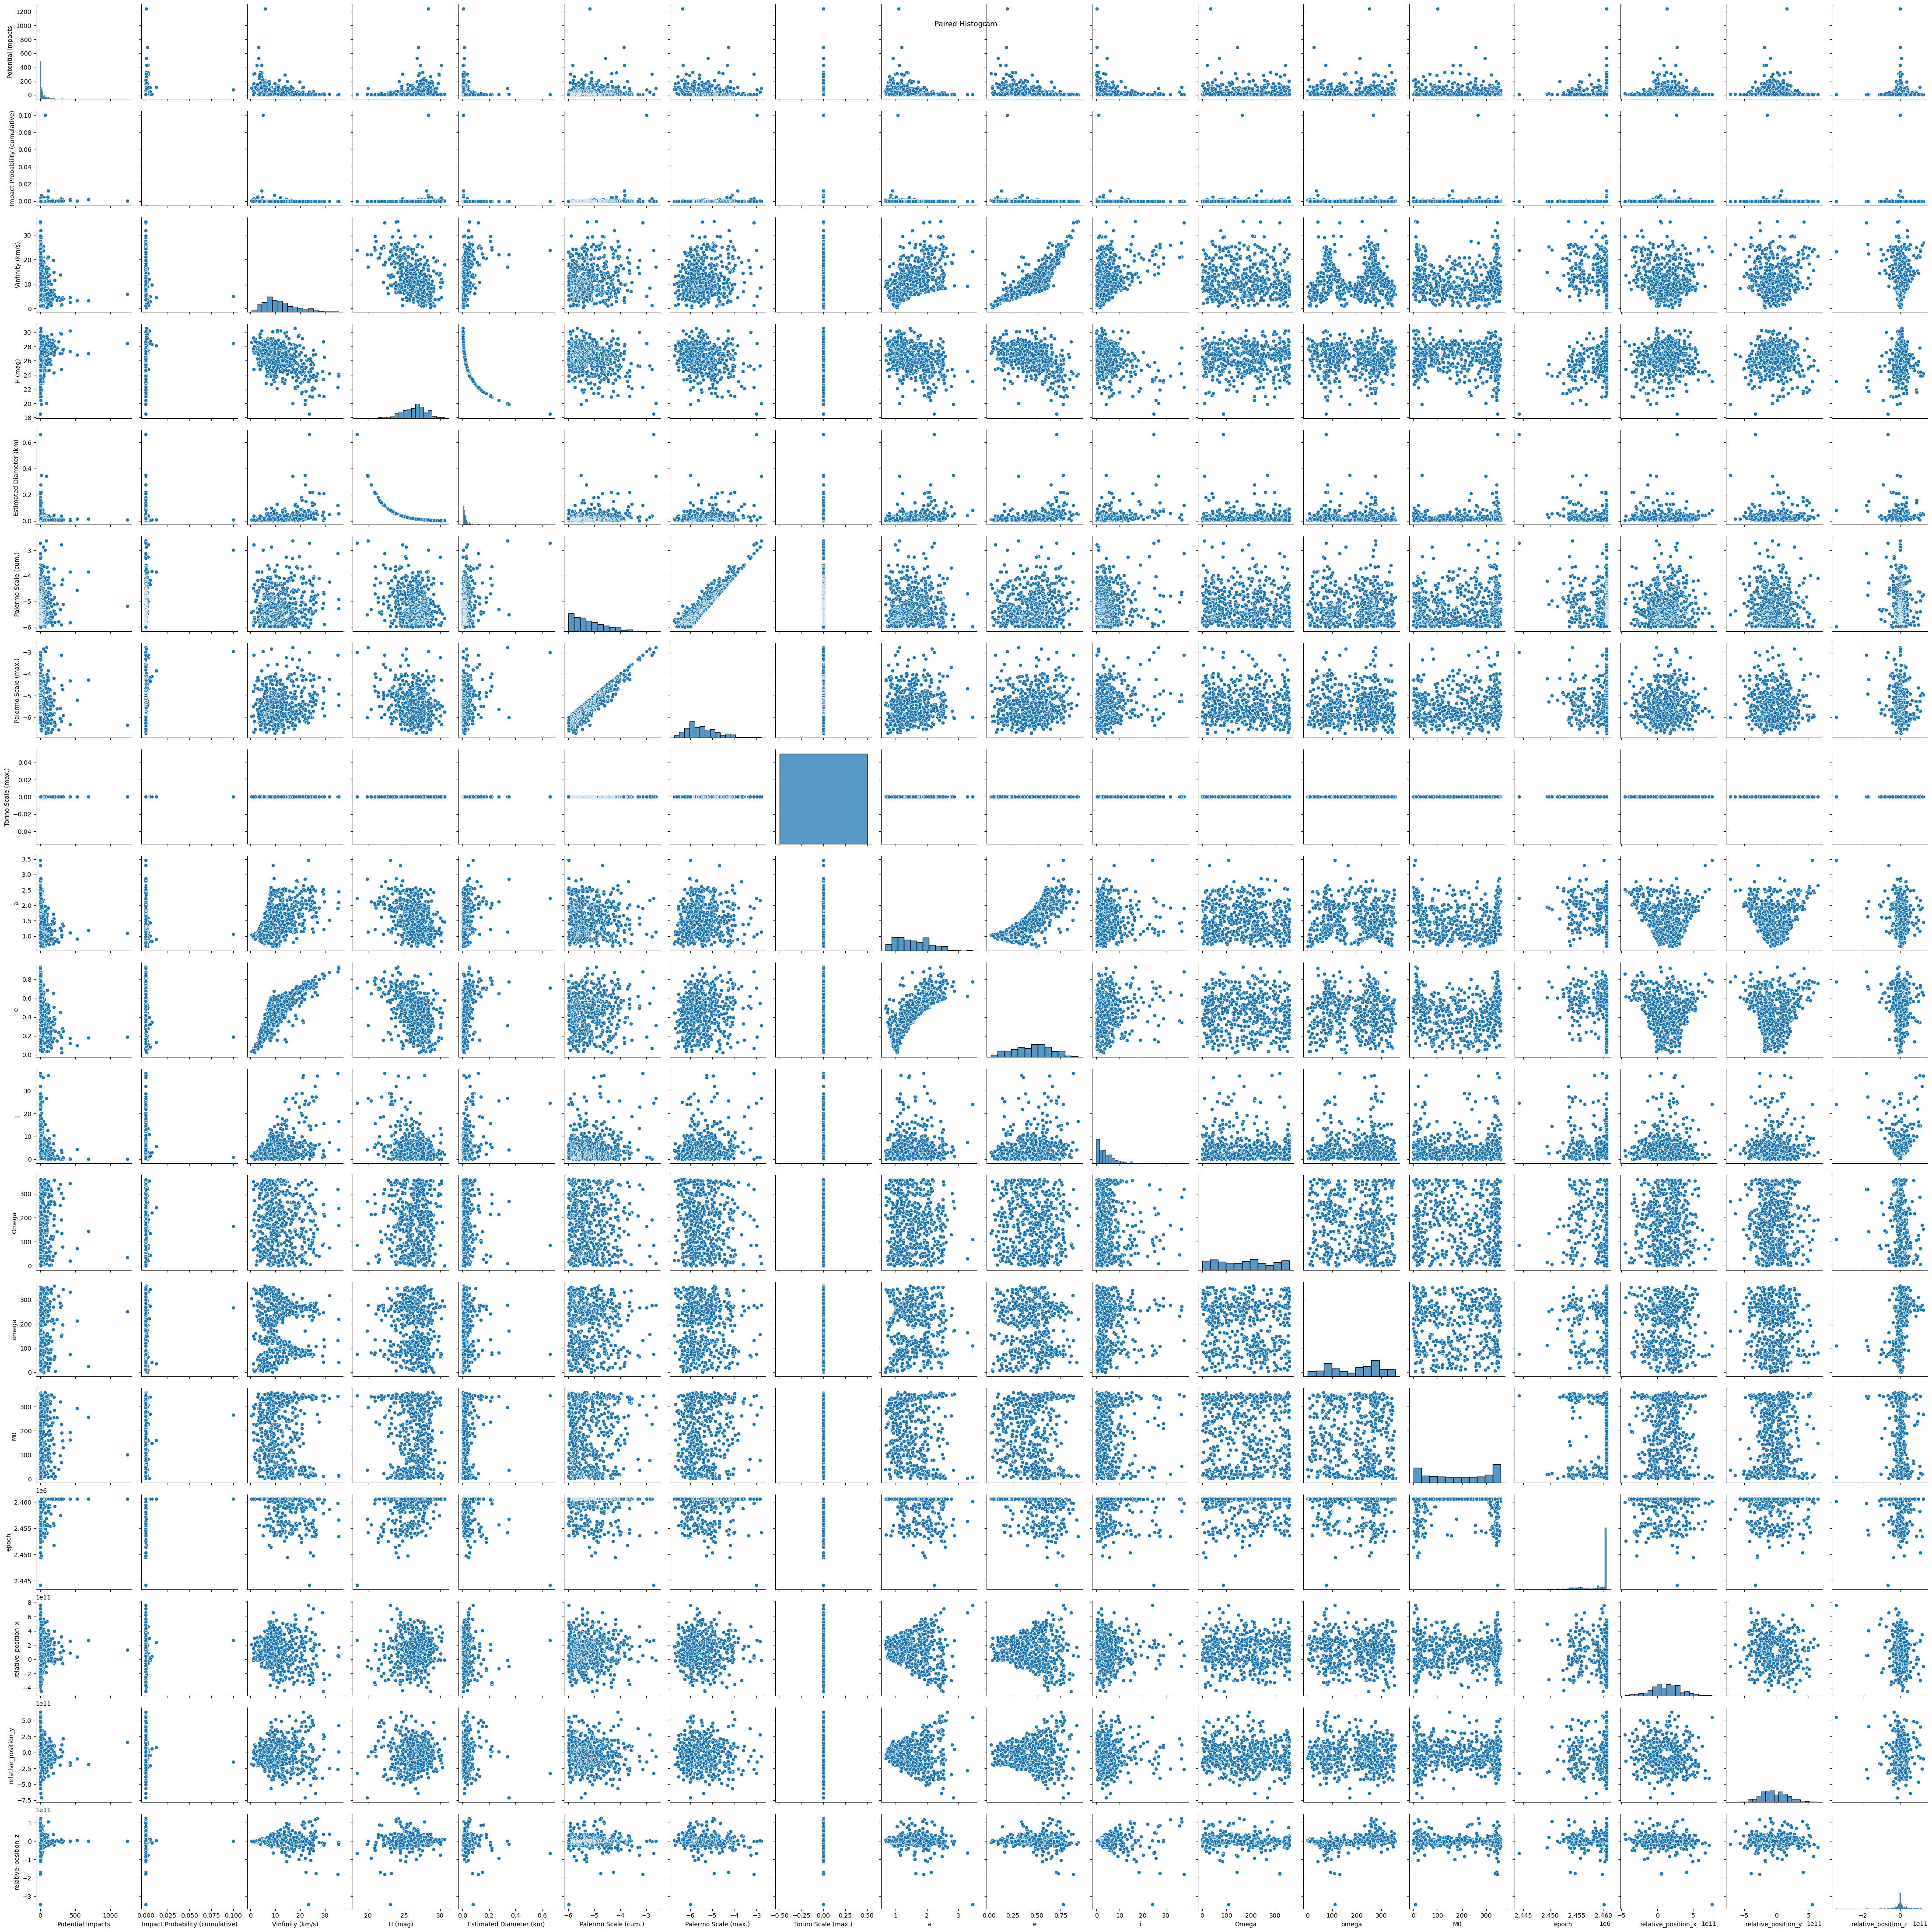

In [63]:
plt.figure(figsize=(25, 25))
sns.pairplot(data=data)
sns.color_palette("mako", as_cmap=True)
plt.suptitle("Paired Histogram")
plt.show()

In [64]:
data['Year Start'] = data['Year Start'].astype(int)
data['Year End'] = data['Year End'].astype(int)

In [65]:
data['Time Interval (years)'] = data['Year End'] - data['Year Start']
data['Relative Position (km)'] = data['Vinfinity (km/s)'] * data['Time Interval (years)'] * 365 * 24 * 3600

data

Object Designation  Potential Impacts  Impact Probability (cumulative)  \
2           2007%20FT3                 89                     8.600000e-07   
3            1979%20XB                  4                     8.500000e-07   
4         2000%20SG344                300                     2.700000e-03   
5           2008%20JL3                 44                     1.700000e-04   
6          2010%20RF12                 70                     1.000000e-01   
..                 ...                ...                              ...   
518       2015%20KE319                  3                     3.500000e-06   
519         2023%20FU6                 16                     1.600000e-05   
520         2023%20NQ1                  1                     1.200000e-07   
521         2024%20BJ3                 12                     2.800000e-06   
522        2011%20WN69                  6                     3.100000e-06   

     Vinfinity (km/s)  H (mag)  Estimated Diameter (km)  Palermo Scale (cum.)  \
2               17.07     20.0                    0.341                 -2.63   
3               23.76     18.5                    0.660                 -2.71   
4                1.36     24.8                    0.037                 -2.78   
5                8.42     25.3                    0.029                 -2.86   
6                5.10     28.4                    0.007                 -2.98   
..                ...      ...                      ...                   ...   
518             12.47     26.6                    0.016                 -5.99   
519              9.82     27.0                    0.014                 -5.99   
520             23.30     23.1                    0.081                 -5.99   
521             17.53     26.0                    0.021                 -5.99   
522             23.08     26.2                    0.020                 -6.00   

     Palermo Scale (max.)  Torino Scale (max.)         a  ...       omega  \
2                   -2.79                  0.0  1.129715  ...  277.183462   
3                   -3.01                  0.0  2.228086  ...   75.579898   
4                   -3.13                  0.0  0.977350  ...  275.546739   
5                   -2.86                  0.0  2.153898  ...  155.609872   
6                   -2.98                  0.0  1.061401  ...  267.433561   
..                    ...                  ...       ...  ...         ...   
518                 -6.13                  0.0  2.396839  ...   40.217742   
519                 -6.31                  0.0  1.933662  ...  212.149992   
520                 -5.99                  0.0  3.462214  ...  110.050708   
521                 -6.53                  0.0  1.974719  ...  268.137962   
522                 -6.24                  0.0  2.514955  ...   89.524883   

             M0      epoch  relative_position_x  relative_position_y  \
2    297.962250  2454180.5        -1.099104e+10        -6.172459e+10   
3    346.318374  2444221.5         2.703217e+11        -3.271281e+11   
4    227.673499  2460600.5         2.134002e+10         2.825774e+10   
5     76.715288  2460600.5         2.510525e+11         2.764810e+11   
6    265.559646  2460600.5         2.688273e+11        -1.443833e+11   
..          ...        ...                  ...                  ...   
518  349.435092  2457163.5         1.628335e+11         4.916899e+11   
519  346.980377  2460030.5        -2.208586e+10         6.978499e+10   
520    7.963028  2460142.5         7.582953e+11         5.519606e+11   
521   75.679230  2460600.5         4.870762e+11         2.728283e+11   
522   11.414717  2455893.5        -8.902685e+10         3.434343e+11   

     relative_position_z  Year Start  Year End  Time Interval (years)  \
2          -1.105619e+08        2024      2119                     95   
3          -6.658330e+10        2056      2113                     57   
4          -1.703516e+08        2069      2122                     53   
5           

In [66]:
# Create a 3D scatter plot
fig = px.scatter_3d(data, 
                     x='relative_position_x', 
                     y='relative_position_y', 
                     z='relative_position_z', 
                     color='Object Designation',  # Use your appropriate column name for designation
                     title='Relative Positions of Asteroids',
                     labels={'relative_position_x': 'X Position (m)',
                             'relative_position_y': 'Y Position (m)',
                             'relative_position_z': 'Z Position (m)'},
                     hover_name='Object Designation',  # This will show designation on hover
                     size_max=10)  # Adjust size_max as necessary

# Show the plot
fig.show()


## Calculating Close Orbital Approach

In [83]:
def predict_position(x, y, z, vx, vy, vz, time):
    return x + vx * time, y + vy * time, z + vz * time

data['vx'] = data['Vinfinity (km/s)'] * np.cos(np.radians(data['i']))
data['vy'] = data['Vinfinity (km/s)'] * np.sin(np.radians(data['i']))
data['vz'] = 0  # Simplified assumption; adjust as necessary

def close_approach_analysis(data, threshold_distance=451234123953, time_interval=5):
    close_approaches = []
    min_year = data['Year Start'].min()
    max_year = data['Year End'].max()

    # Check only a subset of time steps
    time_steps = range(min_year, max_year, time_interval)

    # Iterate over all pairs of objects
    for i, j in combinations(data.index, 2):
        for year in time_steps:
            t_i = year - data.loc[i, 'Year Start']
            t_j = year - data.loc[j, 'Year Start']

            # Predict positions
            x1, y1, z1 = predict_position(data.loc[i, 'relative_position_x'], data.loc[i, 'relative_position_y'], data.loc[i, 'relative_position_z'],
                                          data.loc[i, 'vx'], data.loc[i, 'vy'], data.loc[i, 'vz'],
                                          t_i)
            x2, y2, z2 = predict_position(data.loc[j, 'relative_position_x'], data.loc[j, 'relative_position_y'], data.loc[j, 'relative_position_z'],
                                          data.loc[j, 'vx'], data.loc[j, 'vy'], data.loc[j, 'vz'],
                                          t_j)

            # Calculate distance
            dist = np.sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2 + (z1 - z2) ** 2)

            # Check if distance is below the threshold
            if dist < threshold_distance:
                close_approaches.append((data.loc[i, 'Object Designation'], data.loc[j, 'Object Designation'], year, dist))
    
    #         checking for finding threshold value
    #         print(f'Checking pair: {data.loc[i, "Object Designation"]} and {data.loc[j, "Object Designation"]}')
    #         print(f'Positions: {x1}, {y1}, {z1} and {x2}, {y2}, {z2}')
    #         print(f'Distance: {dist}')

    return close_approaches


In [84]:
close_approaches = close_approach_analysis(data)

In [85]:
close_approach_df = pd.DataFrame(close_approaches, columns=['Object 1', 'Object 2', 'Year (approx.)', 'Distance (approx.)'])
print(close_approach_df)

           Object 1     Object 2  Year (approx.)  Distance (approx.)
0        2007%20FT3    1979%20XB            2024        3.924213e+11
1        2007%20FT3    1979%20XB            2029        3.924213e+11
2        2007%20FT3    1979%20XB            2034        3.924213e+11
3        2007%20FT3    1979%20XB            2039        3.924213e+11
4        2007%20FT3    1979%20XB            2044        3.924213e+11
...             ...          ...             ...                 ...
1843695  2023%20FU6  2011%20WN69            2099        2.860678e+11
1843696  2023%20FU6  2011%20WN69            2104        2.860678e+11
1843697  2023%20FU6  2011%20WN69            2109        2.860678e+11
1843698  2023%20FU6  2011%20WN69            2114        2.860678e+11
1843699  2023%20FU6  2011%20WN69            2119        2.860678e+11

[1843700 rows x 4 columns]


In [139]:
data['Risk Label'] = (data['Impact Probability (cumulative)'] > 4.00000e-07).astype(int)  # spproximate threshold
data = pd.get_dummies(data, drop_first=True)  # Convert categorical variables to dummy variables
X = data[['Vinfinity (km/s)', 'Estimated Diameter (km)', 'Impact Probability (cumulative)']]  # Features
y = data['Risk Label']  # Labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

y_true=y_test


In [140]:
data.shape

(516, 541)

In [141]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      0.88      0.93         8
           1       0.99      1.00      0.99        96

    accuracy                           0.99       104
   macro avg       0.99      0.94      0.96       104
weighted avg       0.99      0.99      0.99       104



In [142]:
new_data = pd.DataFrame({
    'Vinfinity (km/s)': [5.0],
    'Estimated Diameter (km)': [0.051],
    'Impact Probability (cumulative)': [3.000000e-07]
})
new_data.fillna(data.mean(), inplace=True)  # Fill missing values
prediction = model.predict(new_data)
print("Risk Level:", prediction)  # 0 = low risk, 1 = high risk


Risk Level: [1]


In [143]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=2)
grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)


Best parameters: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 200}


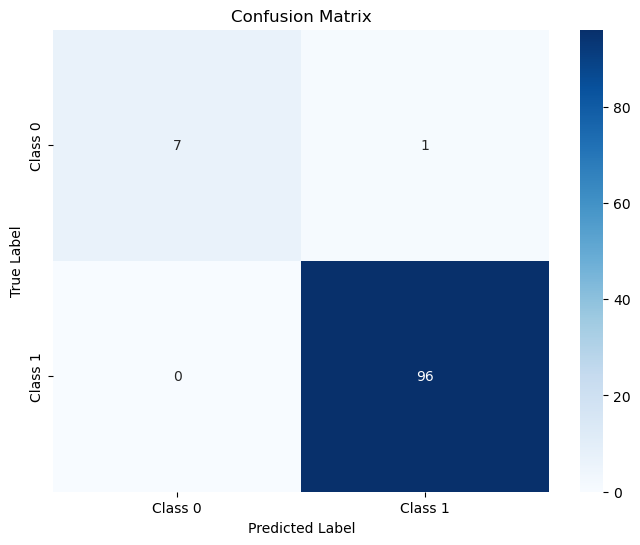

In [144]:
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Class 0', 'Class 1'], 
            yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


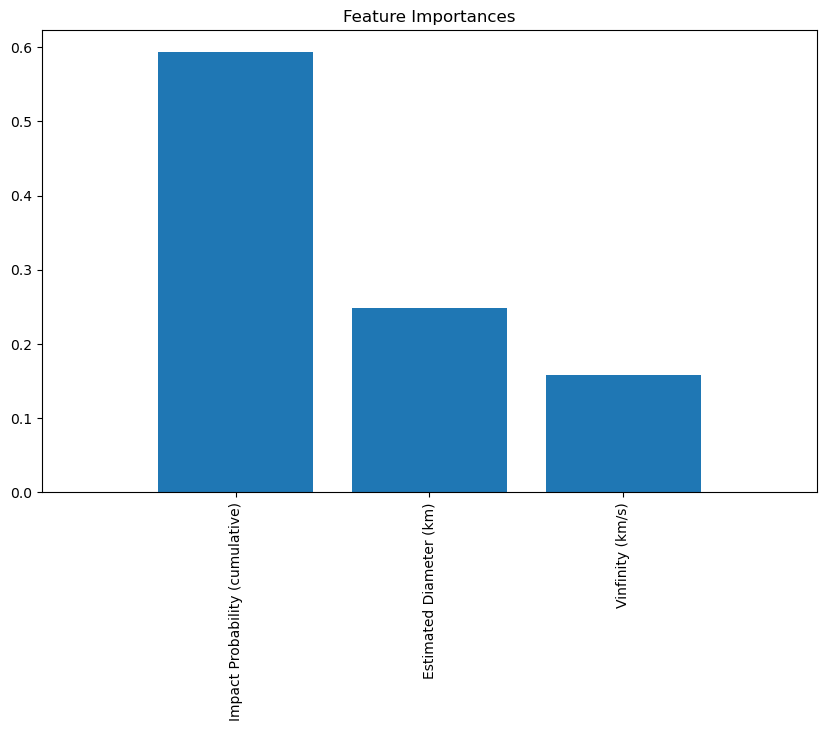

In [154]:
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title('Feature Importances')
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), np.array(['Vinfinity (km/s)', 'Estimated Diameter (km)', 'Impact Probability (cumulative)'])[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()



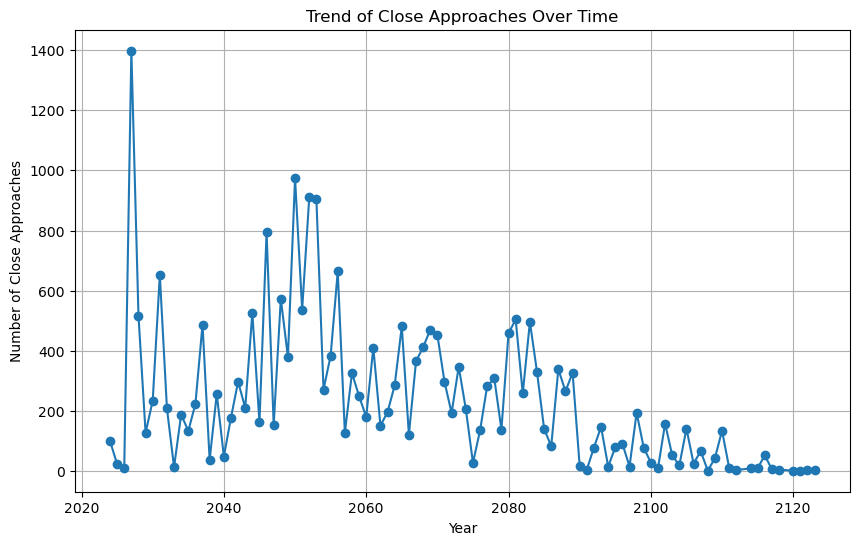

In [155]:
# Convert 'Year Start' to datetime if not already done
data['Year Start'] = pd.to_datetime(data['Year Start'], format='%Y')

# Count close approaches by year
trend_data = data.groupby(data['Year Start'].dt.year)['Potential Impacts'].sum()

# Plot the trend
plt.figure(figsize=(10, 6))
trend_data.plot(kind='line', marker='o')
plt.title('Trend of Close Approaches Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Close Approaches')
plt.grid()
plt.show()


## Clustering based on orbital elements (K-mmeans)

c:\Users\kurup\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.

c:\Users\kurup\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.

c:\Users\kurup\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.

c:\Users\kurup\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than 

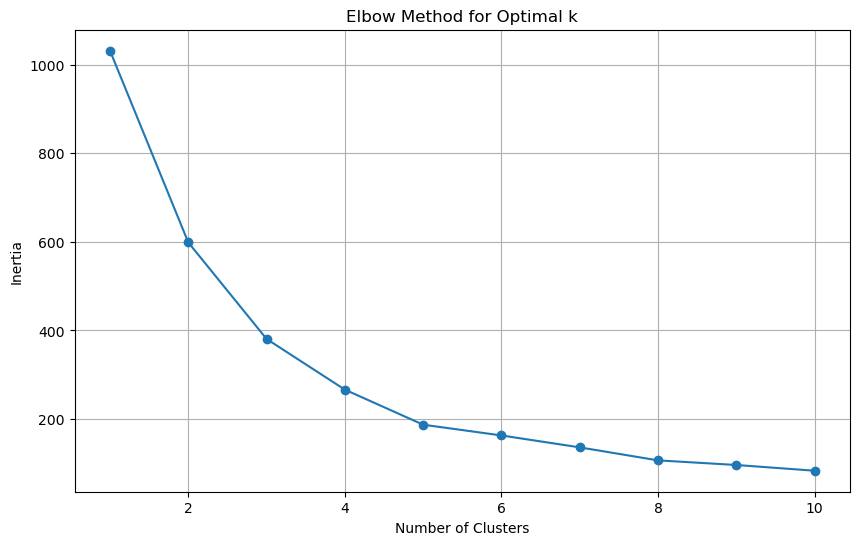

Optimal number of clusters (elbow): 2


In [162]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select relevant features for clustering
features = data[['Vinfinity (km/s)','Estimated Diameter (km)']]  # Adjust columns as necessary

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

inertia = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Calculate the differences in inertia
inertia_diff = np.diff(inertia)

# Find the index of the maximum change
elbow_index = np.argmax(np.diff(inertia_diff)) + 1  # +1 because np.diff reduces the array size by 1

# Get the corresponding number of clusters
optimal_k = k_values[elbow_index]

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid()
plt.show()

print(f'Optimal number of clusters (elbow): {optimal_k}')


c:\Users\kurup\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.



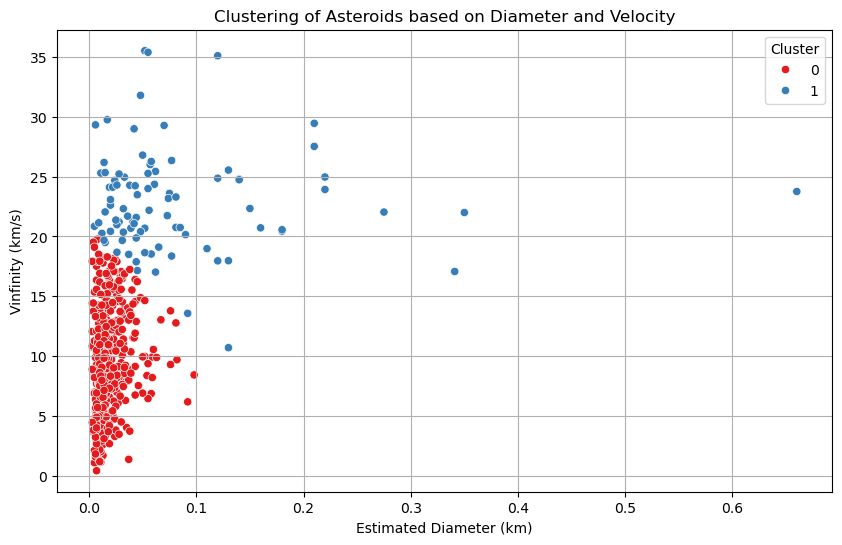

In [163]:
# Fit K-Means
kmeans = KMeans(n_clusters=2, random_state=42)  # Choose an appropriate number of clusters
data['Cluster'] = kmeans.fit_predict(scaled_features)

# Plotting the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Estimated Diameter (km)', y='Vinfinity (km/s)', hue='Cluster', palette='Set1')
plt.title('Clustering of Asteroids based on Diameter and Velocity')
plt.xlabel('Estimated Diameter (km)')
plt.ylabel('Vinfinity (km/s)')
plt.legend(title='Cluster')
plt.grid()
plt.show()